# Can we overlay snow depth with avalanche activity? Maybe at a specific site or path?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

avyobs= pd.read_pickle('../data-prep/pkl/avy_obs.pkl')
weather = pd.read_pickle('../data-prep/pkl/all_wx.pkl')

In [3]:
pd.set_option('display.max_columns', None)
avyobs

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,SHED10,2012-03-26,12:45:00,stein_01,WS,5.0,NL,R1,D1.5,O,B,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet slab released on SE aspect @ 5400 feet (16...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
2,PATH1163,2012-03-16,08:30:00,stein_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet debris ran 2/3 path in main path to 4700 f...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
3,CURLY,2012-03-16,08:34:00,stein_01,U,5.0,NU,U,D1,U,U,U,0,0,NaN,0,0,0,0,0,0,TR,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Terminus at canyon floor elevation.\r\n\r\nDeb...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
4,SHED10,2012-03-10,14:50:00,stein_01,WL,5.0,NaN,R2,D1,I,M,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
5,INFINITY,2012-03-10,14:54:00,stein_01,L,5.0,N,R2,D1,I,T,C,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5- 1/2 Path.,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,SHED07W,2022-03-01,05:04:00,clark_01,SS,5.0,NC,R2,D2,I,T,L,38,2015,E,1760,255,0,0,0,0,TK,-,U,U,False,0.0,0.0,False,0.0,0.0,Slab not observed until March 17th during a sk...,Adam,2022-03-17 21:17:04,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
505,AP1163H,2022-03-23,13:30:00,clark_01,WL,5.0,NU,R1,D1.5,O,T,U,0,1830,SW,1460,370,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Adam,2022-03-23 21:32:42,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
506,SHED10,2022-03-23,13:30:00,clark_01,WL,5.0,N,R2,D2,O,T,C,40,2075,SE,1646,429,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,Obs on Mar. 24th from Hwy,Adam,2022-03-28 16:30:35,10.30.72.4,NaN,0000-00-00 00:00:00,NaN


In [4]:
pd.set_option('display.max_columns', None)
weather

,dt,temp,dew_pt,rH,heat_idx,wind_chill,wind_dir,wind_spd,hr_precip,snow_depth,snowfall_3hr,snowfall_6hr,snowfall_24hr,site,file_name,year,sea_lvl_press,sta_press,altimeter_setting,solar_radiation,pct_possible
0,2022-12-23 04:00:00,-25.0,-31.0,72.0,NaN,NaN,ESE,1G4,0.0,12.6,0.1,0.1,0.3,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
1,2022-12-23 03:00:00,-26.0,-32.0,72.0,NaN,NaN,ESE,1G3,0.0,12.6,0.1,0.1,0.4,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
2,2022-12-23 02:00:00,-27.0,-33.0,71.0,NaN,NaN,ESE,1G4,0.0,12.5,0.1,0.0,0.3,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
3,2022-12-23 01:00:00,-28.0,-34.0,72.0,NaN,NaN,ESE,2G5,0.0,12.5,0.0,0.0,0.2,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
4,2022-12-23 00:00:00,-29.0,-35.0,71.0,NaN,NaN,ESE,2G4,0.0,12.5,0.0,0.0,0.2,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203968,2022-01-01 04:00:00,-4.0,NaN,NaN,NaN,-26.0,S,18G31,NaN,40.8,0.1,0.0,NaN,MRPMT,MRPMT-2022.html,2022,NaN,24.60,29.82,NaN,NaN
203969,2022-01-01 03:00:00,-5.0,NaN,NaN,NaN,-26.0,S,15G21,NaN,41.5,0.5,0.3,NaN,MRPMT,MRPMT-2022.html,2022,NaN,24.59,29.81,NaN,NaN
203970,2022-01-01 02:00:00,-3.0,NaN,NaN,NaN,-23.0,SSW,15G25,NaN,40.9,0.0,0.4,NaN,MRPMT,MRPMT-2022.html,2022,NaN,24.59,29.81,NaN,NaN
203971,2022-01-01 01:00:00,-4.0,NaN,NaN,NaN,-22.0,SW,12G19,NaN,40.7,0.0,1.0,NaN,MRPMT,MRPMT-2022.html,2022,NaN,24.57,29.79,NaN,NaN


In [5]:
avywx = pd.DataFrame()

In [6]:
avywx["avpathid"] = avyobs["avpathid"]
avywx["deb_rail"] = avyobs["deb_rail"]
avywx["deb_hwy"] = avyobs["deb_hwy"]
avywx["snow_depth"] = weather["snow_depth"]
avywx["dt"] = weather["dt"]
avywx

,avpathid,deb_rail,deb_hwy,snow_depth,dt
avrid,,,,,
1,SHED10,False,False,12.6,2022-12-23 03:00:00
2,PATH1163,False,False,12.5,2022-12-23 02:00:00
3,CURLY,False,False,12.5,2022-12-23 01:00:00
4,SHED10,False,False,12.5,2022-12-23 00:00:00
5,INFINITY,False,False,12.4,2022-12-22 23:00:00
...,...,...,...,...,...
504,SHED07W,False,False,19.8,2022-12-02 04:00:00
505,AP1163H,False,False,19.8,2022-12-02 03:00:00
506,SHED10,False,False,19.4,2022-12-02 02:00:00


In [7]:
weather['month'] = pd.DatetimeIndex(weather['dt']).month
#avywx['month'] = pd.DatetimeIndex(weather['dt']).month
#avywx['year'] = pd.DatetimeIndex(weather['dt']).year
#avywx['month_year'] = pd.to_datetime(weather['dt']).dt.to_period('M')
#avywx


In [14]:
avyobs['month'] = pd.DatetimeIndex(avyobs['avobsdate']).month
avyobs.month.value_counts()

2     163
1     123
3     115
12     60
4      30
Name: month, dtype: int64

In [15]:
weather.month.value_counts()

12    21117
11    19433
7     18492
10    18318
3     17170
1     17150
4     17043
5     16772
8     15480
2     15336
6     15198
9     12464
Name: month, dtype: int64

In [21]:
pd.set_option('display.max_columns', None)
avyfeb = avyobs.loc[avyobs.month == 2]
avyfeb

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,month
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,SHED09L,2012-02-28,11:16:00,stein_01,SS,5.0,NS,R2,D2,I,T,L,0,2000,NaN,1424,576,48,45,30,38,MR,-,U,M,False,0.0,0.0,False,0.0,0.0,Likely triggered by avalanche in Shed 9 upper ...,ed,2016-03-17 11:50:56,10.173.132.2,Ted,2020-05-12 20:41:17,64.91.61.64,2
9,INFINITY,2012-02-28,11:09:00,dunda_01,SS,5.0,N,R2,D1,I,T,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Fracture line - 6400',ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,2
10,SHED09,2012-02-28,11:16:00,stein_01,HS,5.0,N,R3,D2,O,T,C,34,2045,NaN,1712,333,424,100,30,65,TK,-,U,D,False,0.0,0.0,False,0.0,0.0,<b>Upper Shed 9</b>\n\nFracture line - 6750'\n...,ed,2016-03-17 11:50:56,10.173.132.2,Ted,2020-05-12 21:28:02,64.91.61.64,2
399,BURNOUT,2019-02-14,12:27:00,clark_01,SS,1.0,AX,R1,D1,I,T,C,38,1493,NaN,1485,8,4,30,20,25,SZ,-,-,D,False,0.0,0.0,False,0.0,0.0,The one slab avalanche triggered out of six Da...,Adam,2020-05-14 11:10:53,184.166.43.50,Adam,2020-05-22 14:02:02,184.166.43.50,2
12,PATH1163,2012-02-22,12:40:00,stein_01,SS,5.0,N,R2,D2,O,T,L,0,0,NaN,0,0,0,0,0,0,TR,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Crown on Looker's Left Top of Main Path- Below...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,PATH1163,2022-02-10,14:49:00,clark_01,WL,5.0,NU,R1,D2,O,M,L,0,0,SW,1400,0,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,Initiated in a gully looker's right about half...,Adam,2022-02-11 16:51:42,170.49.113.19,Adam,2022-02-17 18:45:51,170.49.113.19,2
490,AP1163H,2022-02-20,09:45:00,clark_01,U,5.0,NU,U,D1.5,S,T,C,0,0,SW,1460,0,0,0,0,0,TK,-,U,D,False,0.0,0.0,False,0.0,0.0,Limited visibility and new snow made observati...,Adam,2022-02-20 13:14:27,170.49.113.17,Adam,2022-02-20 13:16:28,170.49.113.17,2
491,PATH1163,2022-02-20,09:45:00,clark_01,L,5.0,NU,R1,D1.5,S,T,L,0,2165,SE,1465,700,0,0,0,0,TK,-,U,D,False,0.0,0.0,False,0.0,0.0,Small dry loose from all the way at the top of...,Adam,2022-02-20 13:16:16,170.49.113.17,NaN,0000-00-00 00:00:00,NaN,2


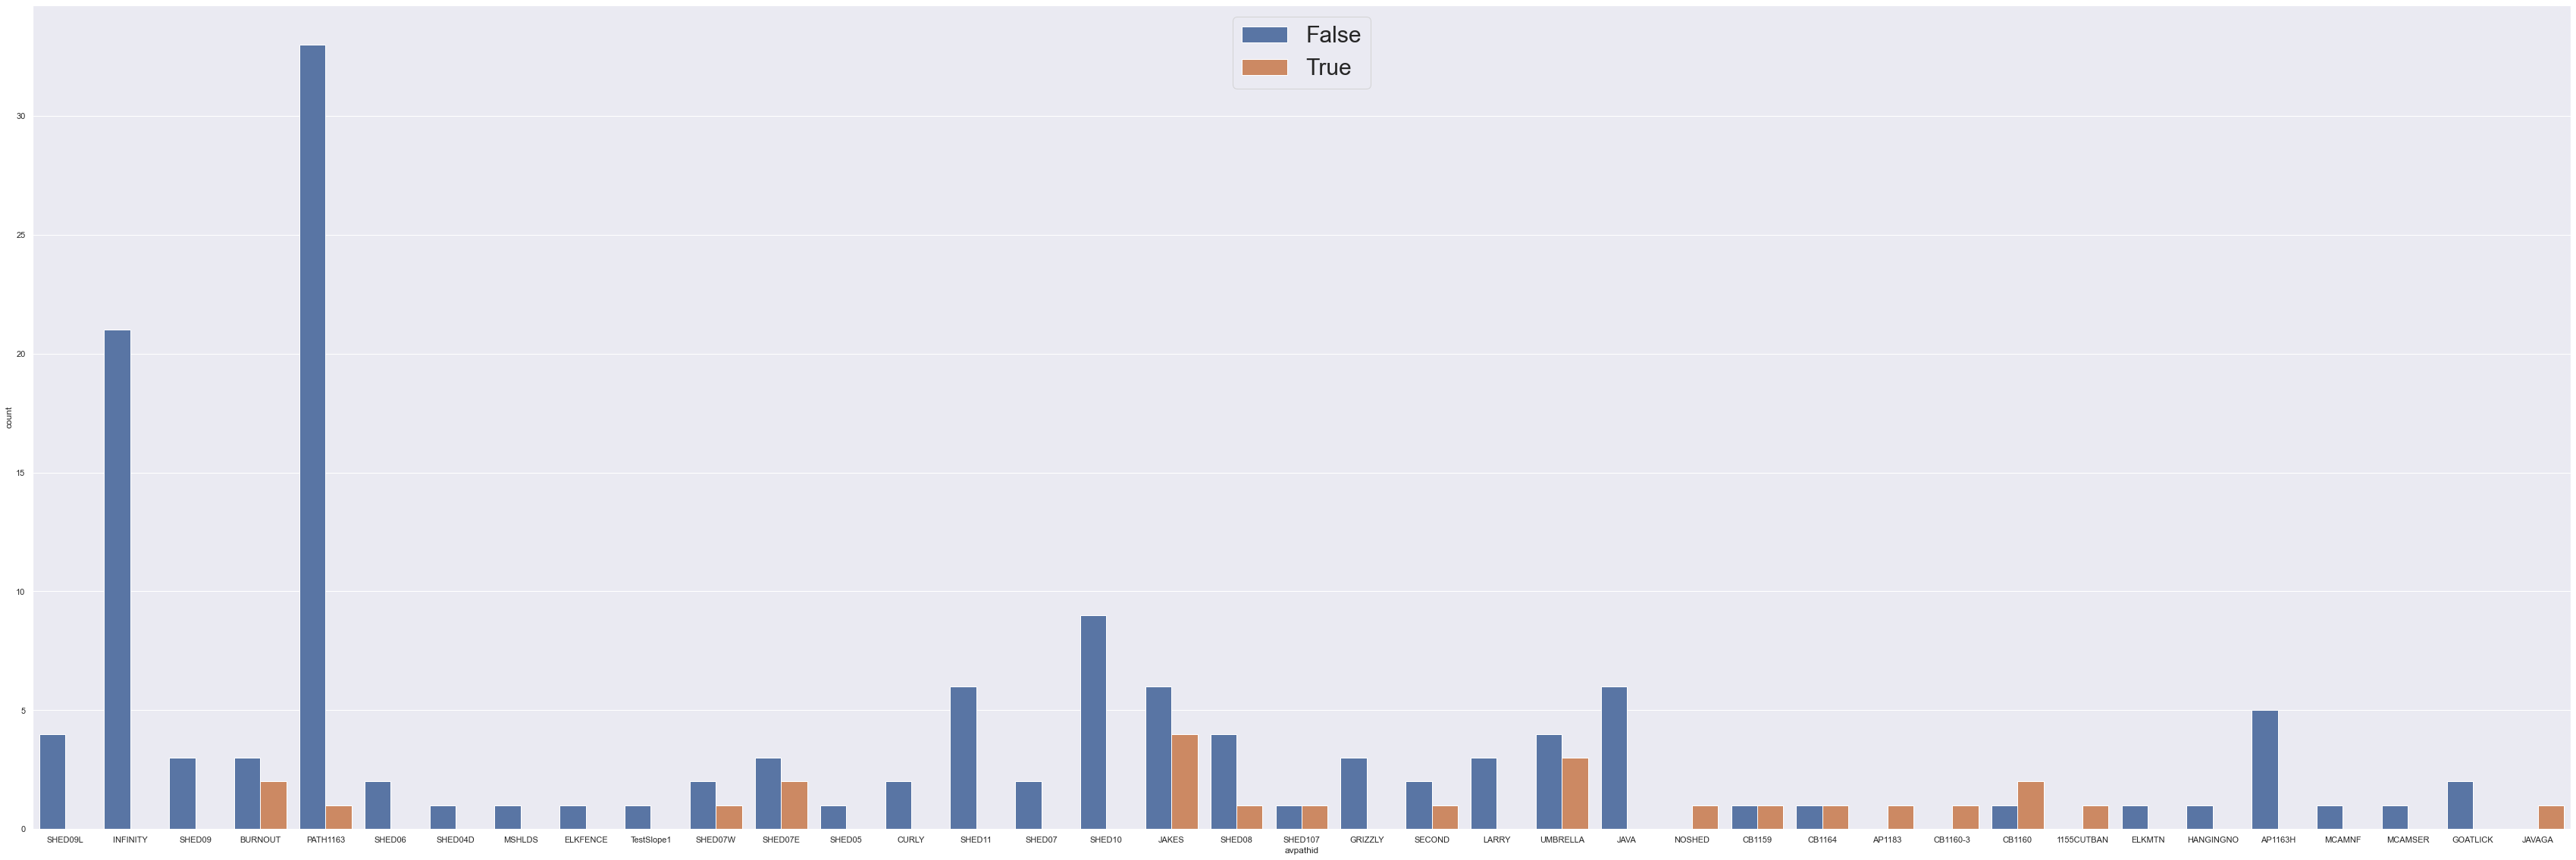

In [28]:
sns.set(rc={'figure.figsize':(60,20)})
plot = sns.countplot(x = 'avpathid',
             hue = 'deb_rail',
             data = avyfeb)
plot.legend(fontsize=30)

In [42]:
narrowavy = avyfeb.loc[:,('avpathid','deb_rail')]
narrowavy

,avpathid,deb_rail
avrid,,
8,SHED09L,False
9,INFINITY,False
10,SHED09,False
399,BURNOUT,False
12,PATH1163,False
...,...,...
489,PATH1163,False
490,AP1163H,False
491,PATH1163,False


In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
snowcat = sns.barplot(x="month_year",
                y="snow_depth",
                data=narrow4)
plt.xticks(rotation=45)

In [36]:
wxfeb = weather.loc[weather.month == 2]
wxfeb['day'] = pd.DatetimeIndex(wxfeb['dt']).day
wxfeb['month_day'] = pd.to_datetime(wxfeb['dt']).dt.to_period('D')
wxfeb

/var/folders/_g/dr204lbj3s1c6m88fsk34kch0000gn/T/ipykernel_38835/4064348981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wxfeb['day'] = pd.DatetimeIndex(wxfeb['dt']).day
/var/folders/_g/dr204lbj3s1c6m88fsk34kch0000gn/T/ipykernel_38835/4064348981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wxfeb['month_day'] = pd.to_datetime(wxfeb['dt']).dt.to_period('D')


,dt,temp,dew_pt,rH,heat_idx,wind_chill,wind_dir,wind_spd,hr_precip,snow_depth,snowfall_3hr,snowfall_6hr,snowfall_24hr,site,file_name,year,sea_lvl_press,sta_press,altimeter_setting,solar_radiation,pct_possible,month,day,month_day
6899,2022-02-28 23:00:00,32.0,32.0,100.0,NaN,NaN,WNW,1G4,0.03,27.9,0.0,0.0,3.8,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN,2,28,2022-02-28
6900,2022-02-28 22:00:00,33.0,33.0,100.0,NaN,NaN,NW,1G3,0.04,27.8,0.0,0.0,3.1,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN,2,28,2022-02-28
6901,2022-02-28 21:00:00,32.0,32.0,100.0,NaN,NaN,WNW,1G3,0.07,28.0,0.0,0.0,3.7,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN,2,28,2022-02-28
6902,2022-02-28 20:00:00,32.0,32.0,100.0,NaN,NaN,WNW,1G3,0.09,28.1,0.0,0.0,3.2,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN,2,28,2022-02-28
6903,2022-02-28 19:00:00,33.0,33.0,100.0,NaN,NaN,WNW,1G3,0.08,28.1,0.0,0.0,4.3,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN,2,28,2022-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203225,2022-02-01 04:00:00,8.0,NaN,NaN,NaN,NaN,N,1G3,NaN,58.0,0.0,0.0,3.7,MRPMT,MRPMT-2022.html,2022,NaN,24.70,29.95,NaN,NaN,2,1,2022-02-01
203226,2022-02-01 03:00:00,8.0,NaN,NaN,NaN,NaN,NNE,3G7,NaN,58.4,0.0,0.0,4.0,MRPMT,MRPMT-2022.html,2022,NaN,24.71,29.96,NaN,NaN,2,1,2022-02-01
203227,2022-02-01 02:00:00,8.0,NaN,NaN,NaN,NaN,NNE,2G5,NaN,59.8,0.0,1.2,5.8,MRPMT,MRPMT-2022.html,2022,NaN,24.71,29.96,NaN,NaN,2,1,2022-02-01
203228,2022-02-01 01:00:00,8.0,NaN,NaN,NaN,NaN,NaN,0G2,NaN,59.5,0.0,1.6,6.8,MRPMT,MRPMT-2022.html,2022,NaN,24.72,29.97,NaN,NaN,2,1,2022-02-01


In [41]:
wxnarrow = wxfeb.loc[:,('snow_depth','day')]
wxnarrow

,snow_depth,day
6899,27.9,28
6900,27.8,28
6901,28.0,28
6902,28.1,28
6903,28.1,28
...,...,...
203225,58.0,1
203226,58.4,1
203227,59.8,1
203228,59.5,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29')])

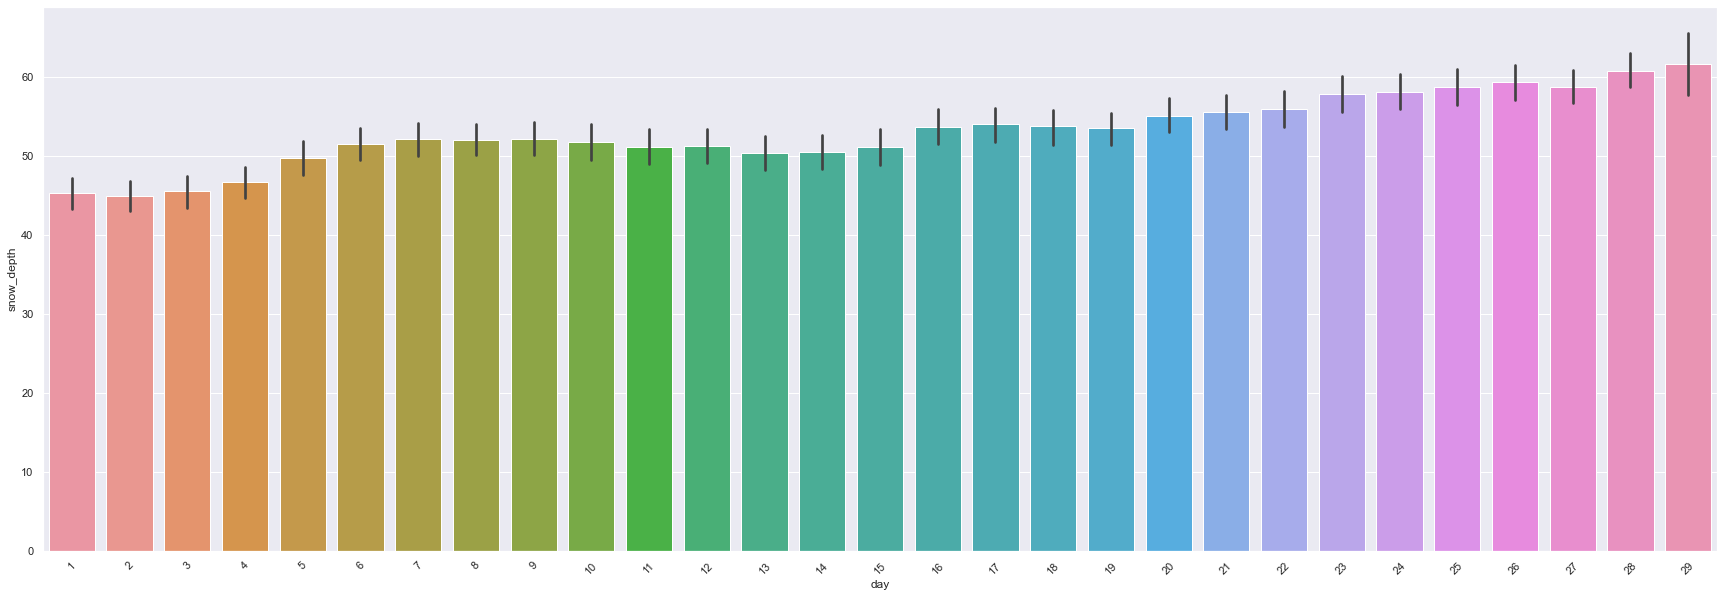

In [39]:
sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(x="day",
                y="snow_depth",
                data=wxfeb)
plt.xticks(rotation=45)

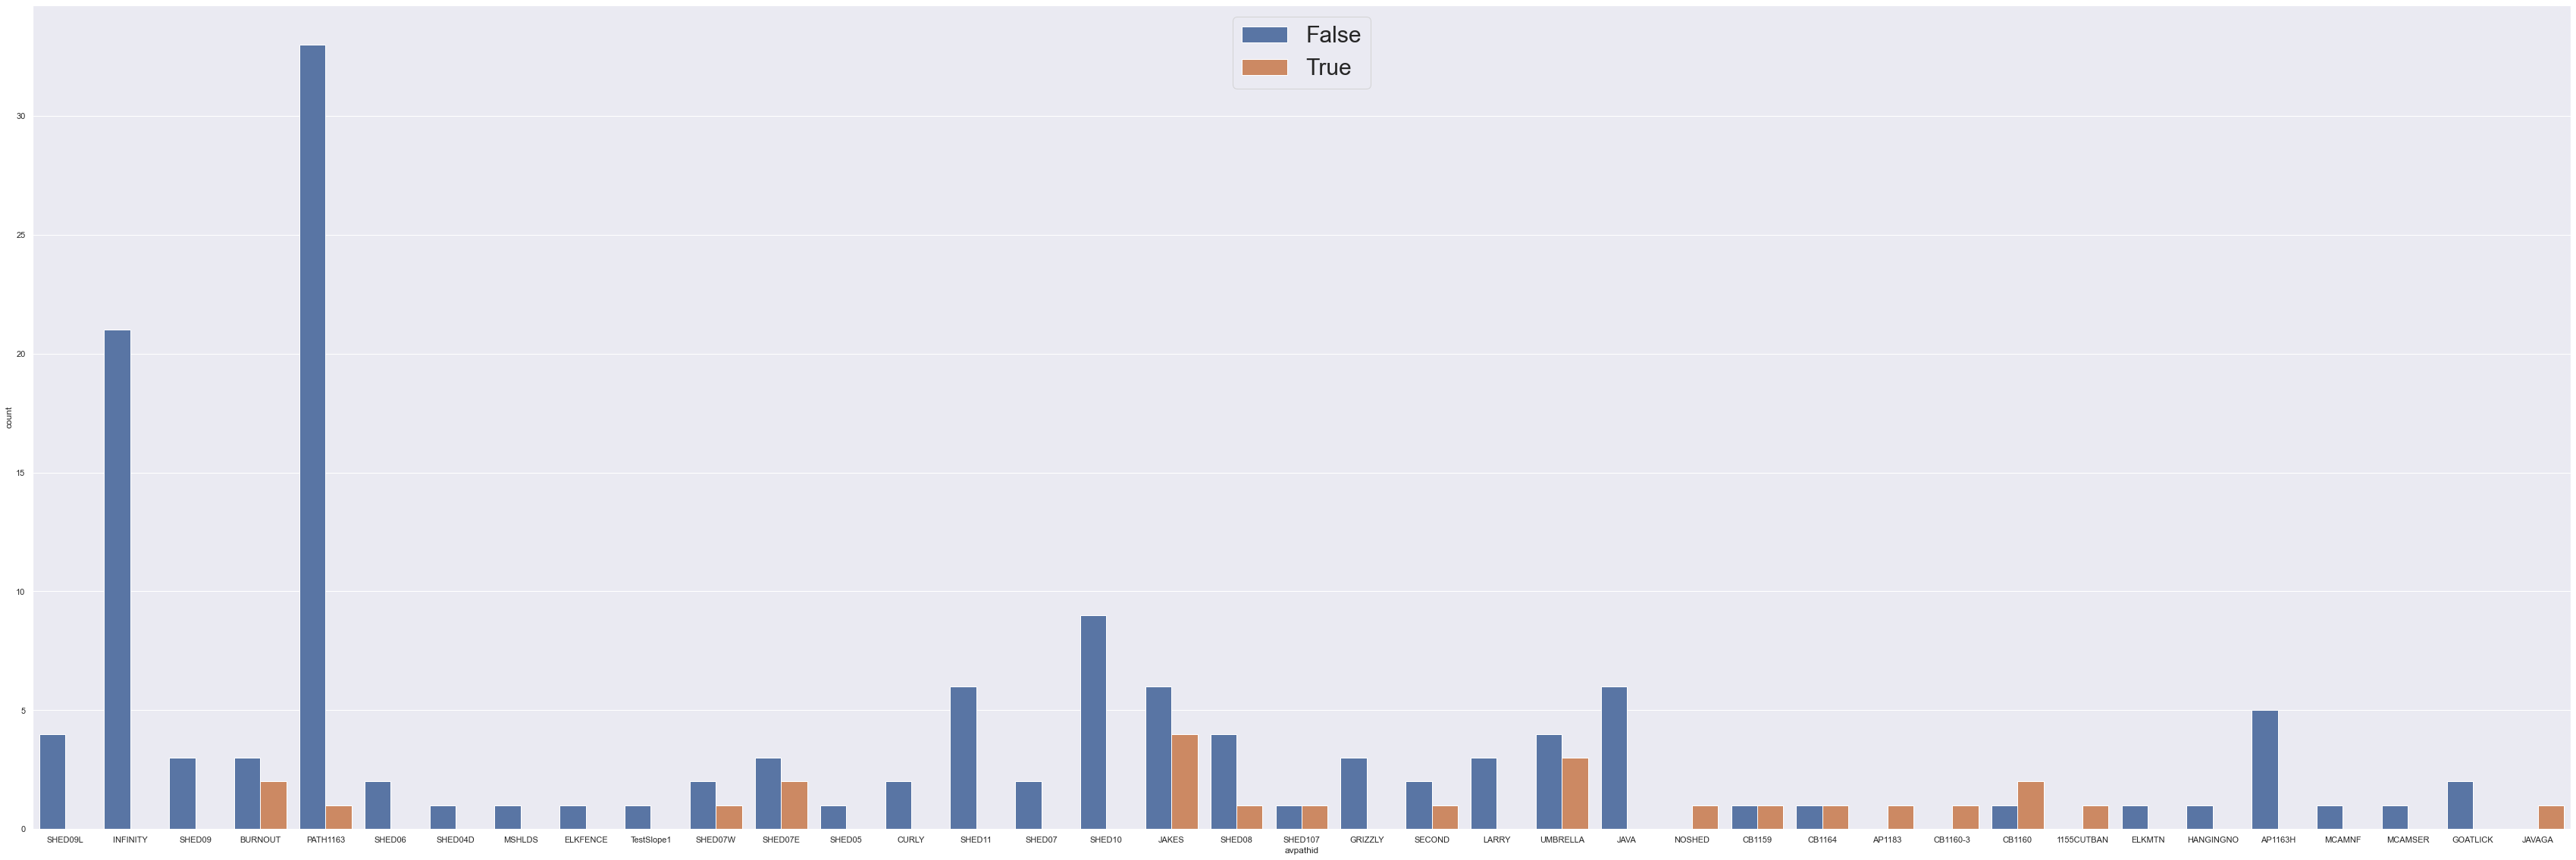

In [47]:
sns.set(rc={'figure.figsize':(60,20)})
plot = sns.countplot(x = 'avpathid',
             hue = 'deb_rail',
             data = avyfeb)
plot.legend(fontsize=30)